[View in Colaboratory](https://colab.research.google.com/github/bengHak/SparseAutoEncoder/blob/master/SparseAutoEncoder.ipynb)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
갯수 : 55000
Epoch: 0001 cost = 0.050951932
Epoch: 0002 cost = 0.017009743
Epoch: 0003 cost = 0.011265538
Epoch: 0004 cost = 0.008822233
Epoch: 0005 cost = 0.007505832
Epoch: 0006 cost = 0.006687050
Epoch: 0007 cost = 0.006127017
Epoch: 0008 cost = 0.005717445
Epoch: 0009 cost = 0.005407216
Epoch: 0010

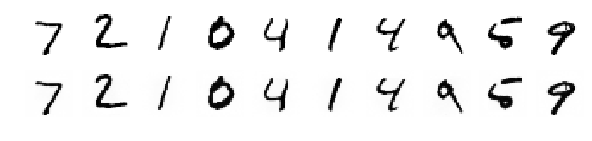

In [1]:
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

learning_rate = 0.0001
training_epochs = 50
batch_size = 100
sp = 0.01 #sparse parameter
rn = 0.02  #random number

print('갯수 :', len(mnist.train.images))

tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, 784])

W1 = tf.get_variable("W1",shape=[784, 1024], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([1024]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.get_variable("W2", shape=[1024, 784], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([784]))
hypothesis = tf.nn.sigmoid(tf.matmul(L1, W2) + b2)

def kld(p,p_hat):
  return tf.reduce_mean(p*(tf.log(p)-tf.log(p_hat))+(1-p)*(tf.log(1-p)-tf.log(1-p_hat)))

cost = tf.reduce_mean(tf.pow(X - hypothesis, 2)) + sp * kld(rn,hypothesis)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

sample_size = 10

samples = sess.run(hypothesis, feed_dict= { X : mnist.test.images})

print(np.max(samples[0]))

fig, ax = plt.subplots(2, sample_size, figsize = (sample_size ,2))

for i in range(sample_size):
    ax[0][i].set_axis_off()
    ax[1][i].set_axis_off()
    ax[0][i].imshow(np.reshape(mnist.test.images[i], (28,28)))
    ax[1][i].imshow(np.reshape(samples[i], (28,28)))

plt.show()